In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
np.random.seed(42)

In [2]:
def norm_feat(features): 
    features = features/features.max(axis = 0)
    return features

def relu(x):
    x = np.maximum(0, x)
    return x

def reluder(z):
    z = 1*(z>0)
    return z

def softmax(z):
    z = np.exp(z)
    z = z/z.sum(axis=1)[:,None]
    return z

def cost(label,layers):
    co = -np.mean(np.log(np.sum((label*layers[n_layers-1]), axis = 1)))

    #co=np.mean(np.sum((np.log(float(-label*y))).T))
    return co

def forwardprop(layers, z, features, n_layers, w, b):
    layers = {0: features}
    for i in range(1,n_layers-1):
        layers[i] = np.dot(layers[i-1], w[i-1]) + b[i-1]
        z[i] = layers[i]
        layers[i] = relu(layers[i])
    layers[n_layers-1] = np.dot(layers[n_layers-2], w[n_layers-2]) + np.array(b[n_layers-2])
    #z[n_layers-1] = layers[n_layers-1]
    layers[n_layers-1] = softmax(layers[n_layers-1])
    return layers, z

def backprop(layers, w, b, n_layers, label, lr):
    dw={}
    db={}
    temp = layers[n_layers-1] - label
    dw[n_layers-2] = (lr)*(1/24000)*(np.dot(temp.T, layers[n_layers-2])).T
    db[n_layers-2] = (lr)*(1/24000)*np.sum(temp, axis = 0)
    for i in range(n_layers-2, 0, -1):
        dw[i-1] = (lr)*(1/24000)*(np.dot((np.dot(temp, w[i].T)*reluder(z[i])).T, layers[i-1])).T
        db[i-1] = (lr)*(1/24000)*(np.sum(np.dot(temp, w[i].T)*reluder(z[i]), axis = 0))
        temp = np.dot(temp, w[i].T)*reluder(z[i])
    return dw,db

In [3]:
rdata = pd.read_csv('classification_train.csv')
rdata = pd.DataFrame(rdata)
data = rdata.copy()
data.drop(data.columns[[0,1]], axis = 1, inplace = True)
data = norm_feat(data)
label = rdata.iloc[:,1]
label = label.iloc[[i for i in range(int(rdata.shape[0]*0.8))]]
label = pd.get_dummies(label)
features = np.zeros((int(rdata.shape[0]*0.8), 784))
features = pd.DataFrame(features)
features.iloc[:int((rdata.shape[0])*0.8)] = data.iloc[:int((rdata.shape[0])*0.8)]

n_neurons_input = 784
n_neurons_output = 10

In [4]:
label.shape

(24000, 10)

In [5]:
#initalize weights and bias
n_layers = int(input('Enter number of layers apart from input and output layer = '))
n_layers = n_layers + 2
n_neurons = []
n_neurons.append(n_neurons_input)
for i in range(n_layers-2):
    a = int(input("enter number of neurons  in hidden layer "+str(i+1) + '='))
    n_neurons.append(a)
n_neurons.append(n_neurons_output)
    
w = {x: np.random.randn(n_neurons[x], n_neurons[x+1]) for x in range(n_layers-1)}
b = {x: np.random.randn(n_neurons[x+1]) for x in range(n_layers-1)}
z = {}
layers = {}
lr = 0.1

Enter number of layers apart from input and output layer = 1
enter number of neurons  in hidden layer 1=112


In [6]:
cosine=[]
list3e=[]
for i in range(1500):
    layers, z = forwardprop(layers, z, features, n_layers, w, b)
    c=cost(label,layers)
    print(c)
    cosine.append(c)
    list3e.append(i+1)
    dw, db = backprop(layers, w, b, n_layers, label, lr)
    for j in range(n_layers-2):
        w[j] = w[j] - dw[j]
        b[j] = b[j] - db[j]

129.00070911872933
91.31126597097378
49.318559531652056
40.9210008416981
31.596381827339645
29.987495376742007
32.659387780116575
31.62559926917077
23.781890671010366
22.907514114057296
28.436802381219945
35.99026245710436
34.150818243589804
25.141255745193426
27.924609783440122
21.191618932581743
24.687450955297376
23.646584260310746
24.67771405055423
19.971645023200562
19.145688082370356
19.31527415598649
24.18667372777906
17.17646667758641
18.549322457484955
20.488807952357465
21.271049940329632
18.021119597822096
14.418413450648057
15.737052172249923
17.61639817107444
16.11189345131293
17.157874372622334
15.10621676137403
18.132743851066074
14.890084881628319
16.529785506585537
14.865656258711708
16.89927790980573
13.903653758674666
15.925000919181866
13.568869632594758
15.556651699168812
13.258571747932516
14.94703955554557
13.16979099565993
14.483110478446052
13.140719824783345
13.767778651691156
13.2850405364609
13.248345383216728
13.14217529853898
12.943911034805797
12.87952771

3.9467759826123534
3.9535680565026947
3.936416566765434
3.943059821189446
3.9259352392436275
3.9326939069377285
3.9147251189518726
3.922255080412963
3.905007571503574
3.9131712155367664
3.89501969165727
3.9037268226895177
3.88565048023151
3.893661734018231
3.8755920519684763
3.8835072749790402
3.866565011457275
3.874525936516895
3.8574073288758517
3.8650134261205795
3.8477213297111574
3.8556506032668296
3.8381255688551326
3.845525608790959
3.827821129514128
3.835155479241148
3.818596436507037
3.8258929941239628
3.809616106372212
3.8178048658197694
3.8005326186554123
3.8078983404547713
3.790595788827445
3.7977387345850797
3.7807336028726946
3.787560375335394
3.7714960772101684
3.778283740757489
3.7618610015588505
3.769028518605142
3.7527361508181207
3.7597483795733604
3.7436395282334263
3.7508816439407844
3.734920412137341
3.7423105879449867
3.7260783262943167
3.7334482005891103
3.717535985171744
3.725206241604243
3.7091709380169045
3.7171661545116614
3.701185722915874
3.709607074364255

2.795717110132681
2.774123869685627
2.791808380075524
2.770278863450236
2.7880350000257392
2.7667291300727386
2.7848380335127336
2.763531958645554
2.781977758065551
2.7606123044284288
2.779391028713441
2.7579320007725814
2.7770841272827043
2.7551939789952553
2.774655853580938
2.752587842375674
2.772447703569837
2.750038548493821
2.7701801559773807
2.7476689556943796
2.7677618150003886
2.7450184847170798
2.765163851469122
2.7422453866578853
2.762527448123297
2.7392313659174063
2.759632503868807
2.736338867607484
2.7567317339135475
2.733255250742776
2.7535967649931683
2.7301255021100146
2.750509424769682
2.72682796246155
2.7472223452958473
2.72377642552848
2.74400431135166
2.7205947794840672
2.740682441475603
2.7173067318571547
2.7373064302590526
2.7138060922366454
2.7337108380187543
2.7104120337148574
2.7302739168338075
2.707281543716859
2.727022738784599
2.704544295441049
2.7242544015254646
2.701589522196201
2.7212607075726076
2.6985171512281885
2.718341872226123
2.695736119239306
2.71

2.3000611661826817
2.2690631207628282
2.2987872322684195
2.2676588794674686
2.2975967557487404
2.266385637121052
2.296540489539558
2.2652055249761123
2.2953951686329077
2.263884238954089
2.294292705494481
2.2625624400186735
2.2930181299132673
2.261165234702546
2.2916181615564666
2.259561169672958
2.2900091175554627
2.2579868189342016
2.2884258403530113
2.2563533365675377
2.286953779924272
2.254881118859752
2.285426029586076
2.253361093240526
2.284012296428681
2.251991473333464
2.2826505858020427
2.250474030346243
2.2810954020467356
2.248799671741278
2.2794408084833933
2.2470935715004683
2.2777562381128926
2.245229419626346
2.2760605304626105
2.2434725721490154
2.274268949708678
2.2416218880921557
2.272382875079072
2.23982642762761
2.2706502573326337
2.23816363663214
2.268802812301855
2.2362843492734124
2.2667087894631957
2.2341797205370217
2.2645766896188144
2.232220670562196
2.2625013138022734
2.230288934104066
2.260429021356857
2.228400350200994
2.2584021351979118
2.2264896921739092


In [7]:
# making the data from train data for testing
tfeatures = data.copy()
tfeatures = data.iloc[[i for i in range(int(rdata.shape[0]*0.8), rdata.shape[0])]]
tlabel = rdata.iloc[:,1]
tlabel = tlabel.iloc[[i for i in range(int(rdata.shape[0]*0.8), rdata.shape[0])]]

In [8]:
x=tlabel.to_numpy()

In [9]:
tlayers = {}
tz = {}
tlayers, tz = forwardprop(tlayers, tz, tfeatures, n_layers, w, b)

In [10]:
count=0
for i in range(6000):
    if(np.argmax(tlayers[2][i])==x[i]):
        count+=1
print(count/60)

76.25


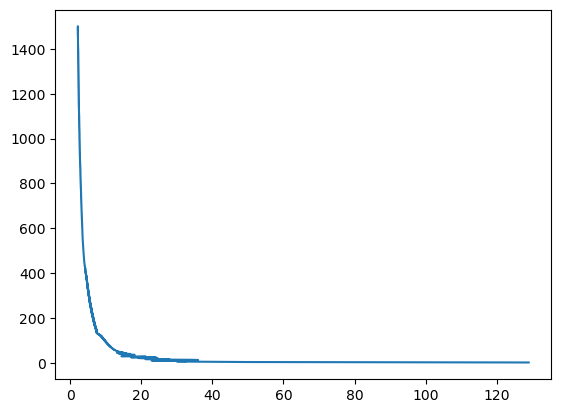

In [11]:
pl.plot(cosine,list3e)